# Road Damage Dataset Tutorial
Welcome to the tutorial of Road Crack Dataset.
In this tutorial, we will show you:
- The structure of the Dataset
- The statistical information of the dataset
- How to evaluate your result

If you have something wrong, please contact :
`maedahi@iis.u-tokyo.ac.jp`

# The sturcture of Road Damage Dataset
Road Damage Dataset contains trained models and Annotated images.
Annotated images are presented as the same format to [PASCAL VOC](http://host.robots.ox.ac.uk/pascal/VOC/).
- RoadCrackDataset (dataset structure is the same format as PASCAL VOC)
    - Adachi
        - JPEGImages : contains images
        - Annotations : contains xml files of annotation
        - ImageSets : contains text files that show training or evaluation image list
    - Chiba
    - Muroran
    - Ichihara
    - Sumida
    - Nagakute
    - Numazu

# Definition of Road Damage

| Damage Type/Class Name | Crack | Linear Crack | Logitudinal | Lateral | Aligator Crack | Other Corruption |
|-------------------------|-------|--------------|-------------|---------|----------------|------------------|
| D00 - Wheel mark part                     | x     | x            | x           |         |                |                  |
| D01 - Construction joint part                     | x     | x            | x           |         |                |                  |
| D10 - Equal interval                     | x     | x            |             | x       |                |                  |
| D11 - Construction joint part                     | x     | x            |             | x       |                |                  |
| D20 - Partial pavement, overall pavement                     | x     |              |             |         | x              |                  |
| D40 - Rutting, bump, pothole, separation                     |       |              |             |         |                | x                |
| D43 - Cross walk blur                     |       |              |             |         |                | x                |
| D44 - White line blur                     |       |              |             |         |                | x   
|

# The statistical information of the dataset

In [1]:
from xml.etree import ElementTree
from xml.dom import minidom
import collections

import os

import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [2]:
base_path = os.getcwd() + '/../data/RoadDamageDataset/'

damageTypes=["D00", "D01", "D10", "D11", "D20", "D40", "D43", "D44"]

# govs corresponds to municipality name.
govs = ["Adachi", "Chiba", "Ichihara", "Muroran", "Nagakute", "Numazu", "Sumida"]

In [3]:
# the number of total images and total labels.
cls_names = []
total_images = 0
for gov in govs:
    
    file_list = os.listdir(base_path + gov + '/Annotations/')
    for file in file_list:
        total_images = total_images + 1
        if file =='.DS_Store' or file.startswith("."):
            pass
        else:
            infile_xml = open(base_path + gov + '/Annotations/' + file)
            tree = ElementTree.parse(infile_xml)
            root = tree.getroot()
            for obj in root.iter('object'):
                cls_name = obj.find('name').text
                cls_names.append(cls_name)
print("total")
print("# of images：" + str(total_images))
print("# of labels：" + str(len(cls_names)))

total
# of images：18106
# of labels：15457


D00 : 2768
D01 : 3789
D10 : 742
D11 : 636
D20 : 2541
D40 : 409
D43 : 817
D44 : 3733


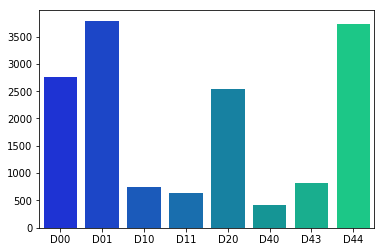

In [4]:
# the number of each class labels.
import collections
count_dict = collections.Counter(cls_names)
cls_count = []
for damageType in damageTypes:
    print(str(damageType) + ' : ' + str(count_dict[damageType]))
    cls_count.append(count_dict[damageType])
    
sns.set_palette("winter", 8)
sns.barplot(damageTypes, cls_count)

In [5]:
# the number of each class labels for each municipality
for gov in govs:
    cls_names = []
    total_images = 0
    file_list = os.listdir(base_path + gov + '/Annotations/')

    for file in file_list:

        total_images = total_images + 1
        if file =='.DS_Store' or file.startswith("."):
            pass
        else:
            infile_xml = open(base_path + gov + '/Annotations/' +file)
            tree = ElementTree.parse(infile_xml)
            root = tree.getroot()
            for obj in root.iter('object'):
                cls_name = obj.find('name').text
                cls_names.append(cls_name)
    print(gov)
    print("# of images：" + str(total_images))
    print("# of labels：" + str(len(cls_names)))
    
    count_dict = collections.Counter(cls_names)
    cls_count = []
    for damageType in damageTypes:
        print(str(damageType) + ' : ' + str(count_dict[damageType]))
        cls_count.append(count_dict[damageType])
        
    print('**************************************************')

Adachi
# of images：3300
# of labels：2924
D00 : 529
D01 : 1013
D10 : 153
D11 : 279
D20 : 172
D40 : 11
D43 : 191
D44 : 567
**************************************************
Chiba
# of images：934
# of labels：797
D00 : 183
D01 : 187
D10 : 13
D11 : 12
D20 : 27
D40 : 3
D43 : 104
D44 : 267
**************************************************
Ichihara
# of images：508
# of labels：482
D00 : 175
D01 : 71
D10 : 18
D11 : 9
D20 : 43
D40 : 8
D43 : 20
D44 : 138
**************************************************
Muroran
# of images：4290
# of labels：3601
D00 : 671
D01 : 574
D10 : 124
D11 : 88
D20 : 1192
D40 : 189
D43 : 50
D44 : 712
**************************************************
Nagakute
# of images：2732
# of labels：2302
D00 : 482
D01 : 477
D10 : 169
D11 : 58
D20 : 351
D40 : 14
D43 : 90
D44 : 659
**************************************************
Numazu
# of images：4064
# of labels：3711
D00 : 560
D01 : 807
D10 : 245
D11 : 129
D20 : 735
D40 : 165
D43 : 161
D44 : 908
************************************

# Check some images in this dataset

In [6]:
import cv2
import random

In [7]:
def draw_images(image_file):
    gov = image_file.split('_')[0]
    img = cv2.imread(base_path + gov + '/JPEGImages/' + image_file.split('.')[0] + '.jpg')
    
    infile_xml = open(base_path + gov + '/Annotations/' + image_file)
    tree = ElementTree.parse(infile_xml)
    root = tree.getroot()
    
    for obj in root.iter('object'):
        cls_name = obj.find('name').text
        xmlbox = obj.find('bndbox')
        xmin = int(xmlbox.find('xmin').text)
        xmax = int(xmlbox.find('xmax').text)
        ymin = int(xmlbox.find('ymin').text)
        ymax = int(xmlbox.find('ymax').text)

        font = cv2.FONT_HERSHEY_SIMPLEX

        # put text
        cv2.putText(img,cls_name,(xmin,ymin-10),font,1,(0,255,0),2,cv2.LINE_AA)

        # draw bounding box
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0,255,0),3)
    return img

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


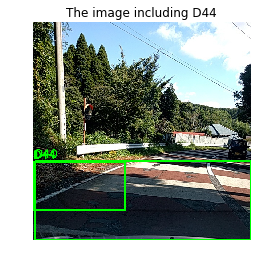

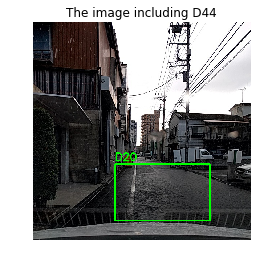

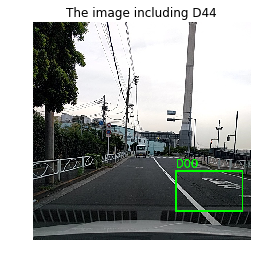

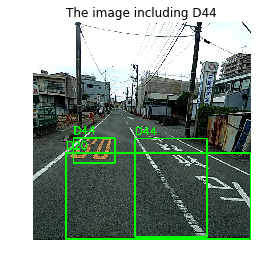

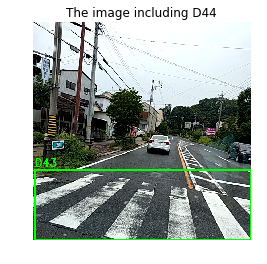

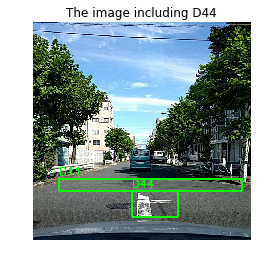

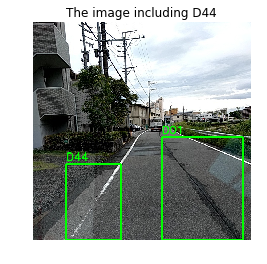

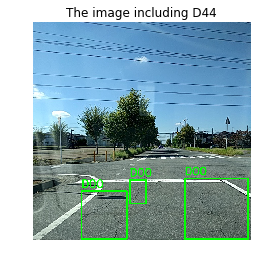

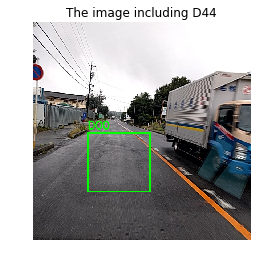

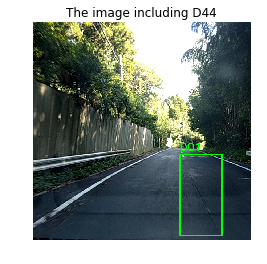

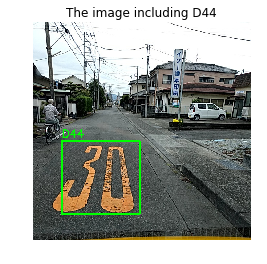

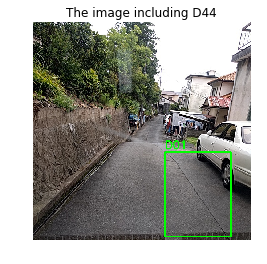

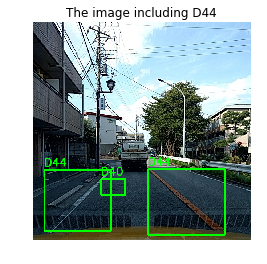

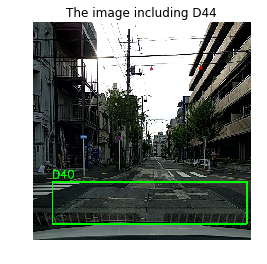

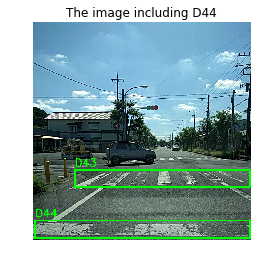

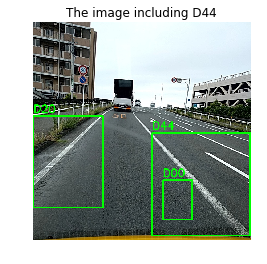

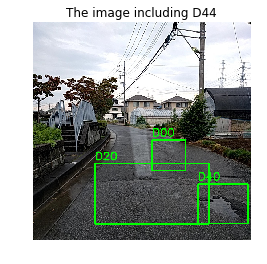

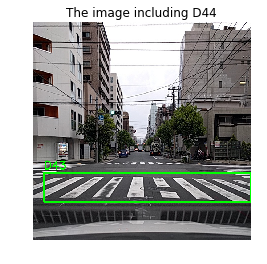

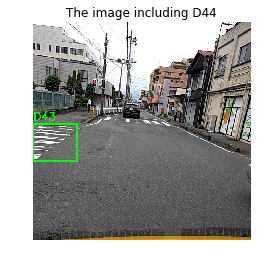

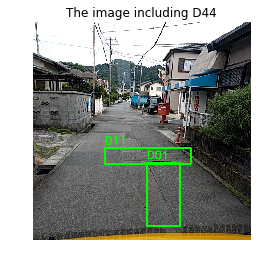

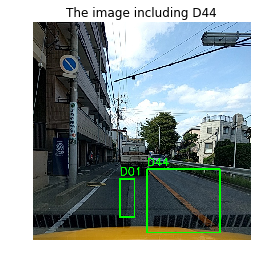

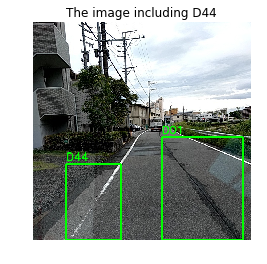

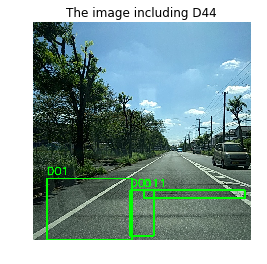

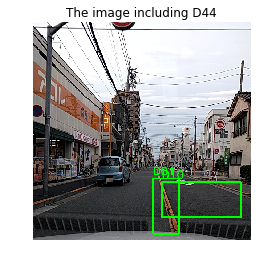

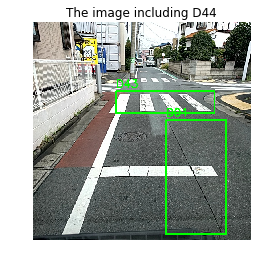

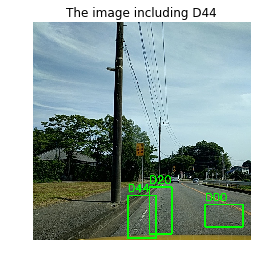

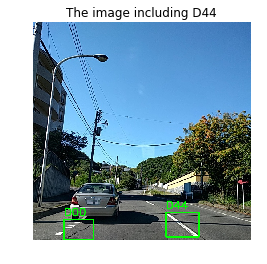

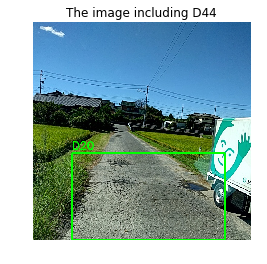

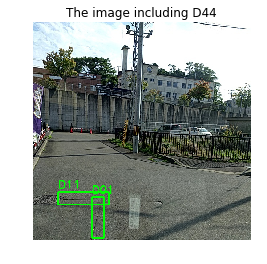

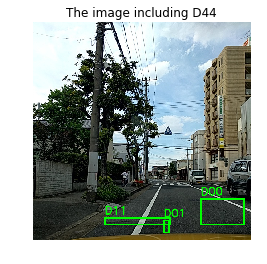

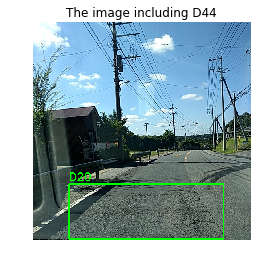

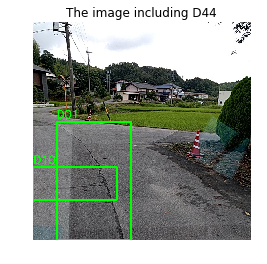

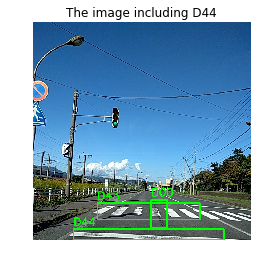

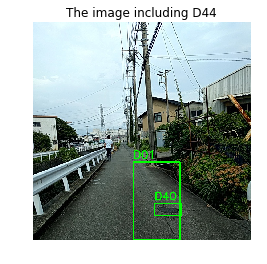

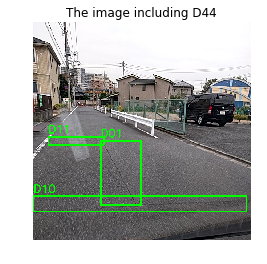

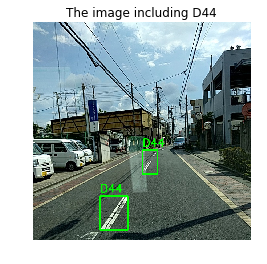

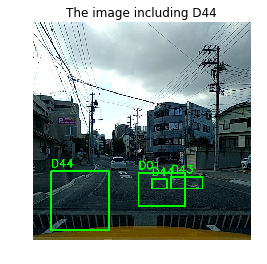

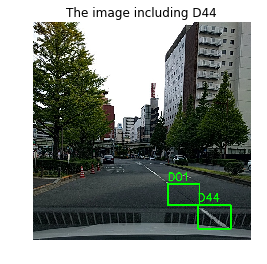

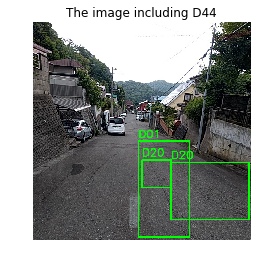

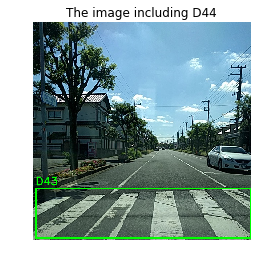

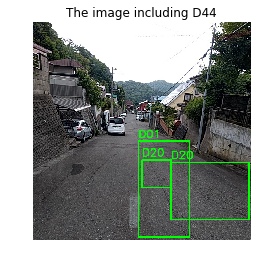

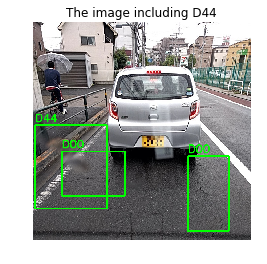

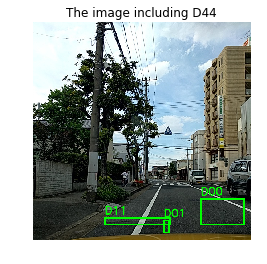

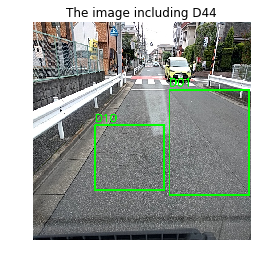

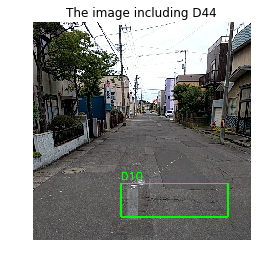

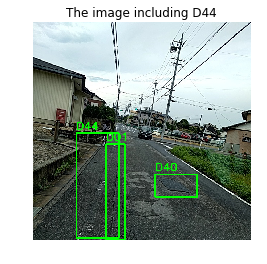

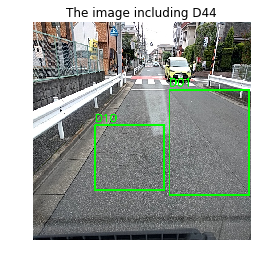

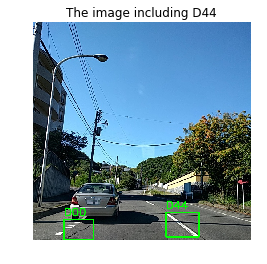

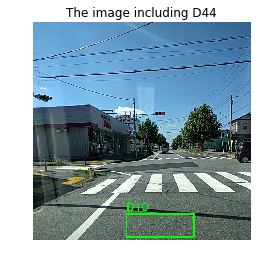

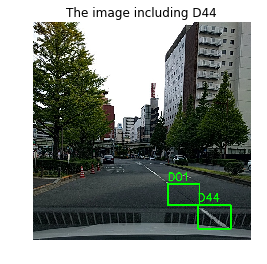

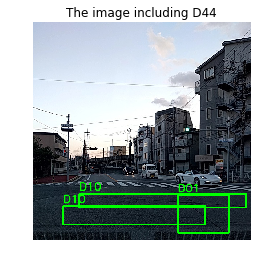

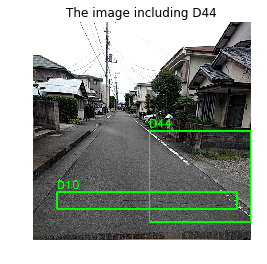

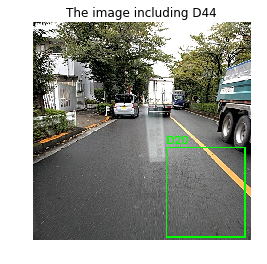

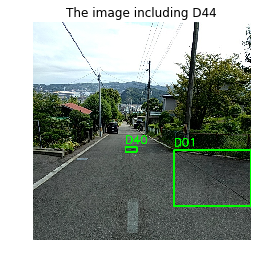

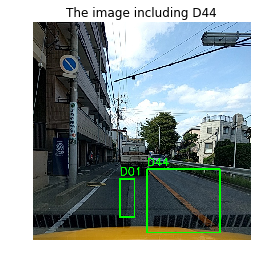

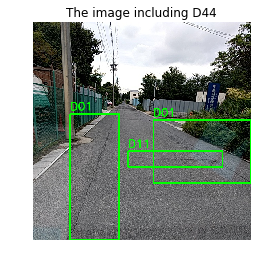

In [8]:
tmp = []
for damageType in damageTypes:
    for gov in govs:
        file = open(base_path + gov + '/ImageSets/Main/%s_trainval.txt' %damageType, 'r')
        for line in file:
            line = line.rstrip('\n').split('/')[-1]

            if line.split(' ')[2] == '1':
                tmp.append(line.split(' ')[0]+'.xml')
                break

axs = {}
figs = {}
random.shuffle(tmp)
for idx, image in enumerate(tmp):
    figs[idx]=plt.figure()
    axs[idx]=figs[idx].add_subplot(111)
    
    img = draw_images(image)
    axs[idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[idx].set_title('The image including ' + damageType)
    axs[idx].axis('off')